In [107]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()


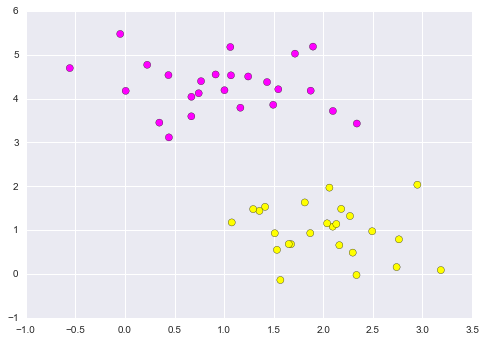

In [108]:
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring');

(-1, 3.5)

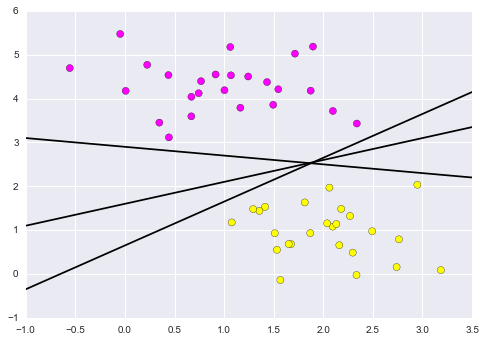

In [109]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    
plt.xlim(-1,3.5)    

(-1, 3.5)

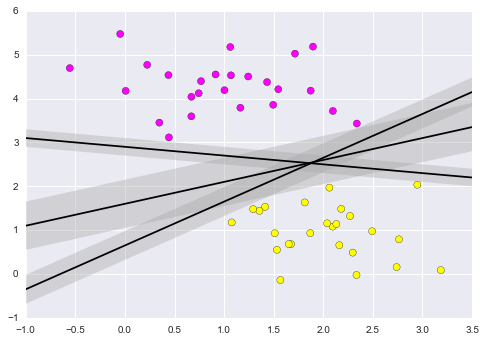

In [110]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',
                     color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5)    

In [111]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
def plot_svc_decision_function(clf,ax=None):
    if ax is None:
        ax=plt.gca()
    x=np.linspace(plt.xlim()[0],plt.xlim()[1],30)
    y=np.linspace(plt.ylim()[0],plt.ylim()[1],30)
    Y, X=np.meshgrid(y,x)
    P=np.zeros_like(X)
    for i,xi in enumerate(X):
        for j,yj in enumerate(Y):
            P[i,j]=clf.decision_function([xi,yj])
    #P=P.reshape(-1,1) 
    #Y=Y.reshape(-1,1)
    #X=X.reshape(-1,1)
    ax.contour(X,Y,P,colors='k',
               levels=[-1,0,1],alpha=0.5,
               linestyles=['--','-','--'])
    

ValueError: X.shape[1] = 30 should be equal to 2, the number of features at training time

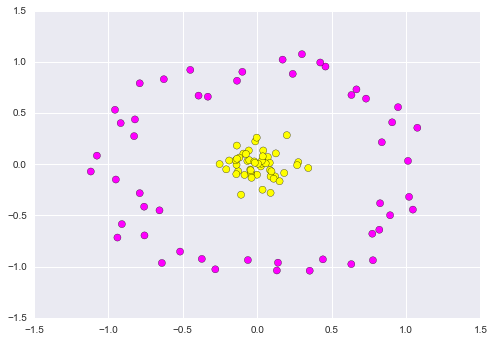

In [119]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],
           s=200,facecolors="none");

ValueError: X.shape[1] = 30 should be equal to 2, the number of features at training time

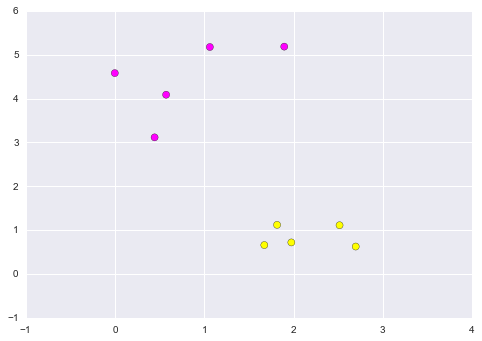

In [122]:
from IPython.html.widgets import interact
def plot_svm(N=10):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,
                  cluster_std=0.60)
    X=X[:N]
    y=y[:N]
    clf=SVC(kernel='linear')
    clf.fit(X,y)
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
    plt.xlim(-1,4)
    plt.ylim(-1,6)
    plot_svc_decision_function(clf,plt.gca())
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],
               s=200,facecolors='none')
    
interact(plot_svm,N=[10,200],kernel='linear');   

ValueError: X.shape[1] = 30 should be equal to 2, the number of features at training time

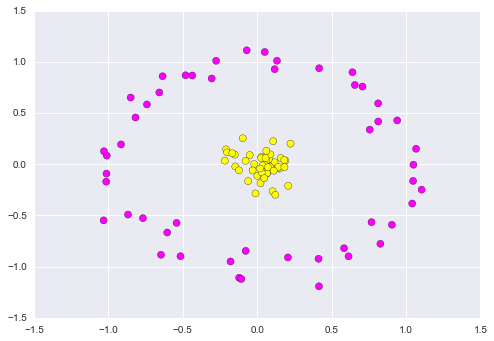

In [123]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
plot_svc_decision_function(clf);

In [89]:
import numpy as np
#np.random.seed()
r=np.random.random(size=(10,2))
print X[:] 
#r[:,1]
print r

[ 0.09933095  0.84303075  0.27632224  0.39937036  0.02352288  0.42665545
  0.43768613  0.98869109  0.26811453  0.01296423]
[[ 0.4666353   0.09933095]
 [ 0.31362134  0.84303075]
 [ 0.84789039  0.27632224]
 [ 0.66536427  0.39937036]
 [ 0.94313958  0.02352288]
 [ 0.363743    0.42665545]
 [ 0.65479463  0.43768613]
 [ 0.66781717  0.98869109]
 [ 0.26481237  0.26811453]
 [ 0.30203333  0.01296423]]
